<a href="https://colab.research.google.com/github/travelwithdata/Time_Series_Analaysis/blob/SARIMA/TSA_Portlandoregon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/portland-oregon-average-monthly-.csv')
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Month                                                                                       115 non-null    object
 1   Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [ ]:
df = df.rename(columns={"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114": "riders"})

In [ ]:
df.tail()

,Month,riders
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,Portland Oregon average monthly bus ridership ...,n=114


In [ ]:
df = df.iloc[:-1 , :]

In [ ]:
df['riders'] = df['riders'].astype(int)

In [ ]:
df.head()

,Month,riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df = df.set_index('Month')

In [ ]:
df.head()

,riders
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


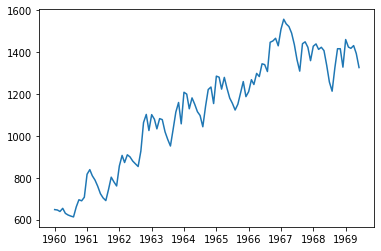

In [ ]:
plt.plot(df);

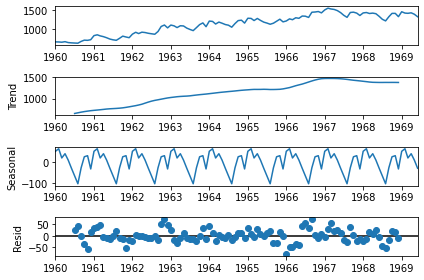

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

test = seasonal_decompose(df)

test.plot()

plt.show()

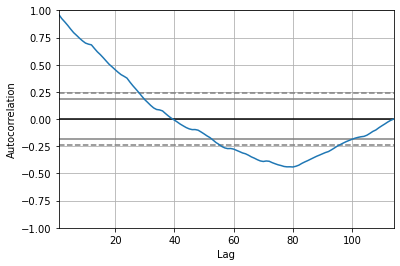

In [ ]:
pd.plotting.autocorrelation_plot(df)
plt.show()

In [ ]:
df_1 = df.diff().dropna() 

df_2 = df_1.diff(periods = 12).dropna() 

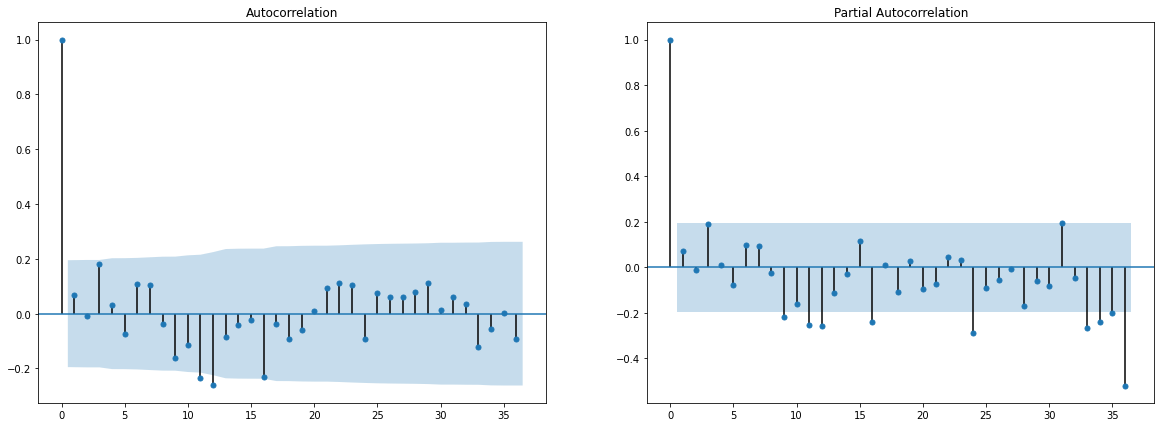

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(df_2, lags = 36, ax=ax1)
plot_pacf(df_2, lags = 36, ax=ax2)
plt.show()

In [ ]:
model=sm.tsa.SARIMAX(df,order=(0,1,0),seasonal_order=(1,1,1,12))
sarima=model.fit()
print(sarima.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                               riders   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -501.340
Date:                              Tue, 13 Dec 2022   AIC                           1008.680
Time:                                      05:08:50   BIC                           1016.526
Sample:                                  01-01-1960   HQIC                          1011.856
                                       - 06-01-1969                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.186      1.739      0.082      -0.041       0.688
ma.S.L12      -0.99

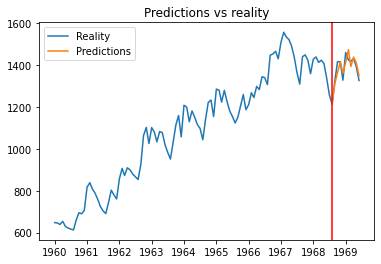

In [ ]:
import datetime

pred = sarima.predict(103, 113)

plt.plot(df, label = 'Reality')
plt.plot(pred, label = 'Predictions')

plt.title('Predictions vs reality')

plt.legend()

plt.axvline(x= datetime.date(1968,8,1), color='red');

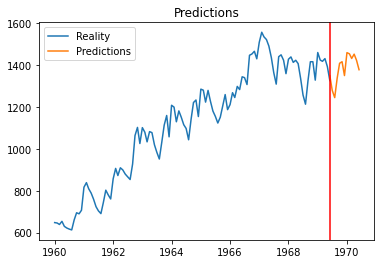

In [ ]:
pred = sarima.predict(113, 125)

plt.plot(df, label = 'Reality')
plt.plot(pred, label = 'Predictions')

plt.title('Predictions')

plt.legend()

plt.axvline(x= datetime.date(1969,6,1), color='red');